In [42]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

#Dossier du notebook,
ROOT = Path().resolve()

#Remonter 3 niveaux : notebook → cinema_de_la_cité → src → racine,
PROJECT_ROOT = ROOT.parents[2]

csv_path = PROJECT_ROOT / "data" / "row" / "tmdb_full.csv"

df = pd.read_csv(csv_path)

C:\Users\jb_le\AppData\Local\Temp\ipykernel_15376\3780701345.py:15: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [43]:
# création d'un dataframe d'exploitation ('films_fr')

films_fr = df[df["original_language"] == "fr"].copy()

In [44]:
# suppression des colonnes

films_fr = films_fr.drop(columns=['jupyter labadult', 'budget', 'homepage', 'popularity', 'revenue', 'status', 'tagline'])  

In [45]:
# changement du type de 'release_date' en datetime

films_fr.release_date = pd.to_datetime(films_fr.release_date, errors="coerce")

In [46]:
# création de la colonne 'year'

films_fr['year'] = films_fr['release_date'].dt.year

In [47]:
# changement du type de 'year', 'runtime' et 'vote_average' en Int64

films_fr['year'] = films_fr['year'].astype('Int64')
films_fr['runtime'] = films_fr['runtime'].astype('Int64')
#films_fr['vote_average'] = films_fr['vote_average'].astype('Int64')

In [48]:
# création de la colonne 'decade' afin de mentionner la décennie de chaque films

films_fr["decade"] = (films_fr["year"] // 10) * 10

In [49]:
# Films Français avec une note > 6

seuil_note = 6
films_fr = films_fr[(films_fr.original_language == 'fr') & (films_fr.vote_average >= seuil_note)]

In [50]:
# Total valeurs NULL trié pour chaque colonnes

films_fr.isna().sum().sort_values(ascending = False)

production_companies_country    3717
backdrop_path                   2219
overview                         854
poster_path                      345
year                              19
decade                            19
release_date                      19
genres                             0
imdb_id                            0
id                                 0
original_language                  0
original_title                     0
spoken_languages                   0
runtime                            0
production_countries               0
title                              0
vote_count                         0
vote_average                       0
video                              0
production_companies_name          0
dtype: int64

In [51]:
# remplacement des valeurs absentes dans 'release_date', 'poster_path' et 'overview' par la valeur NaN
# remplacement de tous les valeurs à 0 dans 'runtime' par Nan

films_fr['release_date'].replace('', np.nan, inplace=True)
films_fr['poster_path'].replace('', np.nan, inplace=True)
films_fr['overview'].replace('', np.nan, inplace=True)

films_fr['runtime'].replace(0, np.nan, inplace=True)


In [52]:
# Suppression des lignes ayant la valeur 'NaN' dans les colonnes 'release_date', 'poster_path', 'runtime' et overview.

films_fr.dropna(subset=['release_date'], inplace=True)
films_fr.dropna(subset=['poster_path'], inplace=True)
films_fr.dropna(subset=['runtime'], inplace=True)
films_fr.dropna(subset=['overview'], inplace=True)

In [53]:
# création d'une fonction afin de convertir les colonnes en list 
# transformation du type de 'genres', 'production_companies_name_list' et 'production_countries_list' et 'production_companies_country' de string en list 


def convertir_en_liste(x):
    if pd.isna(x):                      # si (x) is not available -> return[]            
        return []
    try:
        return ast.literal_eval(x)
    except:
        return []

        

films_fr['genres_list'] = films_fr['genres'].apply(convertir_en_liste)
films_fr['production_companies_name_list'] = films_fr["production_companies_name"].apply(convertir_en_liste)
films_fr['production_countries_list'] = films_fr['production_countries'].apply(convertir_en_liste)
films_fr['production_companies_country_list'] = films_fr['production_companies_country'].apply(convertir_en_liste)
films_fr['spoken_languages_list'] = films_fr['spoken_languages'].apply(convertir_en_liste)

                                                                                               
# films_fr = films_fr.explode('genres_list')
# films_fr = films_fr.explode('production_companies_name_list')
# films_fr = films_fr.explode('production_countries_list')
# films_fr = films_fr.explode('production_companies_country_list')


In [54]:
# suppression des colonnes doublons

films_fr = films_fr.drop(columns=['genres', 'production_companies_name', 'production_countries', 'production_companies_country', 'spoken_languages'])

In [55]:
# total des valeur ou manquantes ou aberrantes par colonnes

films_fr.isna().sum().sort_values(ascending = False)

backdrop_path                        1524
id                                      0
imdb_id                                 0
original_language                       0
original_title                          0
overview                                0
poster_path                             0
release_date                            0
runtime                                 0
title                                   0
video                                   0
vote_average                            0
vote_count                              0
year                                    0
decade                                  0
genres_list                             0
production_companies_name_list          0
production_countries_list               0
production_companies_country_list       0
spoken_languages_list                   0
dtype: int64

In [56]:
# vérification des doublons
# si output > 0  -->   films_fr = films_fr.drop_duplicates(subset=["imdb_id"]) 

films_fr.duplicated(subset=["imdb_id"]).sum()

np.int64(0)

In [57]:
films_fr["spoken_languages_list"].apply(type).value_counts()

spoken_languages_list
<class 'list'>    6200
Name: count, dtype: int64

In [58]:
# valeurs aberantes dans la colonne 'runtime'

films_fr[films_fr['runtime'] > 240][['title', 'runtime', 'vote_count', 'year']]

,title,runtime,vote_count,year
2344,The French Revolution,360,39,1989
34394,A Cursed Monarchy,480,1,2005
81217,Lire,690,2,1986
83149,Les Compagnons de Baal,350,1,1968
104445,Rossini: Guillaume Tell,247,1,2013
108101,Shoah: Four Sisters,273,6,2018
114322,Les Rois Maudits,616,3,1972
121793,Les Allumettes suédoises,287,2,1996
144279,"Paris, the Great Saga",296,2,2012
168962,"The Vampires or, The Arch Criminals of Paris",422,89,1915


In [59]:
# films ayant un 'vote_count' > 1500

films_fr[films_fr['vote_count'] > 1500][['title', 'runtime', 'vote_count', 'year']]

,title,runtime,vote_count,year
112,The 400 Blows,99,1843,1959
155,Amélie,122,10469,2001
223,Breathless,90,1562,1960
322,La Haine,98,3421,1995
616,A Trip to the Moon,15,1513,1902
806,Irreversible,98,2458,2002
1360,Persepolis,95,1698,2007
1612,Taxi,86,2139,1998
1614,Taxi 2,82,1529,2000
1848,Asterix & Obelix: Mission Cleopatra,108,3055,2002


In [60]:
import os
print("Notebook exécuté depuis :", os.getcwd())

Notebook exécuté depuis : C:\Users\jb_le\Documents\JB\WILD CODE SCHOOL\COURS\PROJETS\Projet_recommandation_film\src\cinema_de_la_cite\Notebook


In [21]:
# Dossier où on va mettre le CSV propre
clean_folder = PROJECT_ROOT / "data" / "clean"
clean_folder.mkdir(parents=True, exist_ok=True)   # crée le dossier s'il n'existe pas

# Chemin complet du fichier
output_path = clean_folder / "tmdb_final.csv"

# Sauvegarde
films_fr.to_csv(output_path, index=False)

print("Fichier sauvegardé ici :", output_path)

Fichier sauvegardé ici : C:\Users\jb_le\Documents\JB\WILD CODE SCHOOL\COURS\PROJETS\Projet_recommandation_film\data\clean\tmdb_final.csv


In [61]:
# regroupement des colonnes 'year' et 'genres_list'

films_genres= films_fr[['year', 'genres_list']].head()        

In [62]:
# regroupement (groupby) afin de comptabiliser avec '.size' 

films_genres = films_fr.explode("genres_list").dropna(subset=["genres_list"])

genre_counts = (films_genres.groupby(["year", "genres_list"]).size().reset_index(name="n_films").sort_values('n_films', ascending= False))
genre_counts.head()


,year,genres_list,n_films
1392,2019,Drama,136
1447,2022,Drama,129
1446,2022,Documentary,123
1356,2017,Drama,109
1428,2021,Documentary,101


In [63]:
top5_genres = (genre_counts.groupby("genres_list")["n_films"].sum().nlargest(5).index)


In [64]:
top5_data = genre_counts[genre_counts["genres_list"].isin(top5_genres)]
pivot = top5_data.pivot(index="year", columns="genres_list", values="n_films")


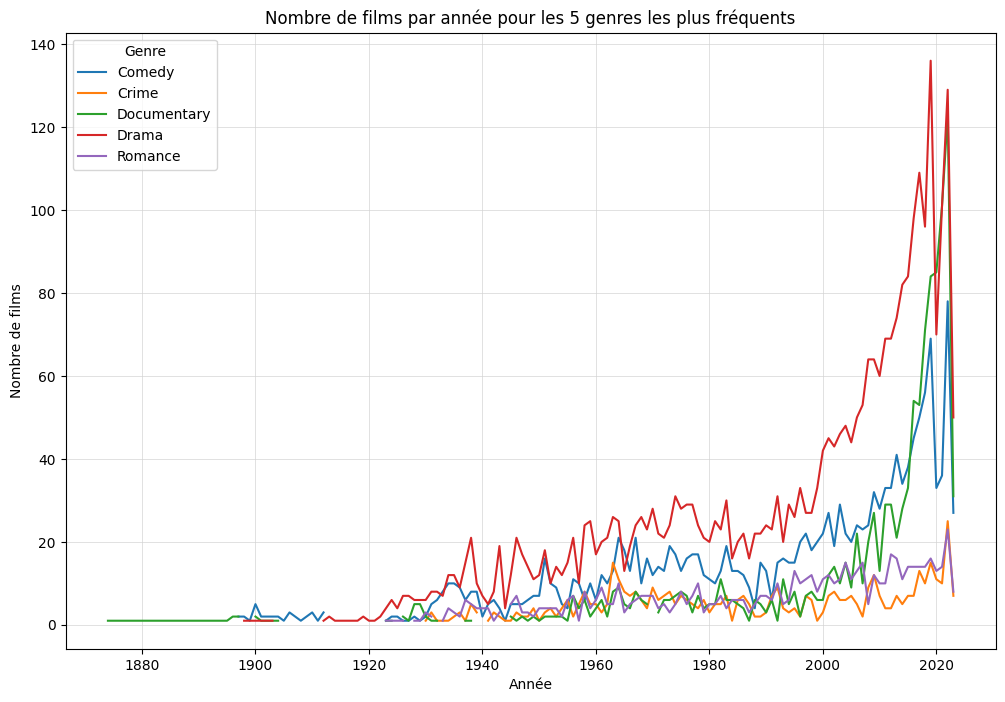

In [65]:
plt.figure(figsize=(12, 8))
pivot.plot(ax=plt.gca())   # on trace toutes les colonnes d'un coup

plt.title("Nombre de films par année pour les 5 genres les plus fréquents")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.grid(True, color='lightgray', linewidth=0.7, alpha=0.7)
plt.legend(title="Genre")
plt.show()